<a href="https://colab.research.google.com/github/BrenZelaya/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible subjects
subjects = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Ciudadanía",
    "Arte", "Música", "Tecnología"
]

# Generate data for 100 students
data = []
for i in range(100):
  name = f"Nombre {i+1}"
  surname = f"Apellido {i+1}"
  dni = random.randint(10000000, 99999999)
  subject = random.choice(subjects)
  q1_grade = round(random.uniform(1, 10), 1)
  q2_grade = round(random.uniform(1, 10), 1)
  q3_grade = round(random.uniform(1, 10), 1)
  absences = random.randint(0, 20)

  data.append([name, surname, dni, subject, q1_grade, q2_grade, q3_grade, absences])

# Create DataFrame
df = pd.DataFrame(data, columns=["Nombre", "Apellido", "DNI", "Materia", "1er Trimestre", "2do Trimestre", "3er Trimestre", "Faltas a clases"])

# Display the first few rows of the DataFrame
print(df.head())

     Nombre    Apellido       DNI              Materia  1er Trimestre  \
0  Nombre 1  Apellido 1  30676601  Lengua y Literatura            1.5   
1  Nombre 2  Apellido 2  31263523     Educación Física            6.8   
2  Nombre 3  Apellido 3  90397695   Ciencias Naturales            8.4   
3  Nombre 4  Apellido 4  94181110           Ciudadanía            6.1   
4  Nombre 5  Apellido 5  84977865           Matemática            8.1   

   2do Trimestre  3er Trimestre  Faltas a clases  
0            3.9            9.4                5  
1            5.1            8.4               19  
2            8.2            5.5                3  
3            7.1            5.2                0  
4            1.2            3.9                4  


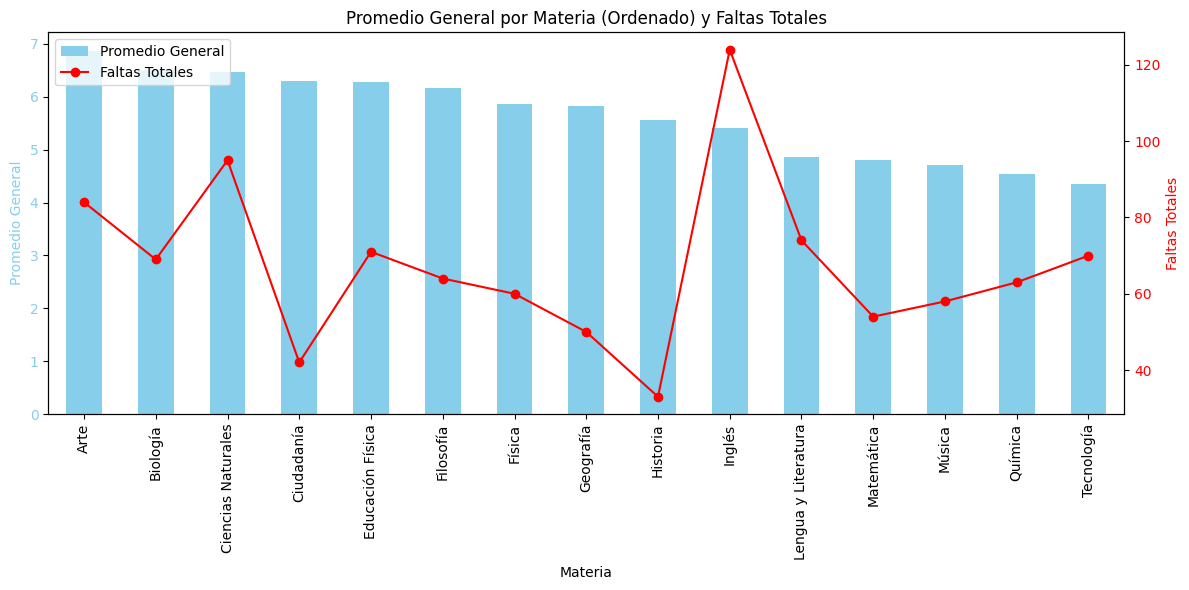

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate average grade per subject
average_grades = df.groupby("Materia")[["1er Trimestre", "2do Trimestre", "3er Trimestre"]].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate total absences per subject
total_absences = df.groupby("Materia")["Faltas a clases"].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind="bar", ax=ax1, color="skyblue", label="Promedio General")
ax1.set_ylabel("Promedio General", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Promedio General por Materia (Ordenado) y Faltas Totales")

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind="line", ax=ax2, color="red", marker="o", label="Faltas Totales")
ax2.set_ylabel("Faltas Totales", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add labels and legend
plt.xticks(rotation=45, ha="right")
fig.tight_layout()
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

# Show the plot
plt.show()

In [5]:
 df.to_csv("datos_alumnos.csv", index=False)